In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import numpy as np
import math
import re

studentid = os.path.basename(sys.modules[__name__].__file__)


def log(question, output_df, other):
    print("--------------- {}----------------".format(question))

    if other is not None:
        print(question, other)
    if output_df is not None:
        df = output_df.head(5).copy(True)
        for c in df.columns:
            df[c] = df[c].apply(lambda a: a[:20] if isinstance(a, str) else a)

        df.columns = [a[:10] + "..." for a in df.columns]
        print(df.to_string())


def question_1(city_pairs):
    """
    :return: df1
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    df1 = pd.read_csv(city_pairs);
    df1['passenger_in_out'] = df1.apply(lambda row: 'SAME' if row['Passengers_In'] == row['Passengers_Out'] else ('IN' if row['Passengers_In'] > row['Passengers_Out'] else 'OUT'), axis=1)
    df1['freight_in_out'] = df1.apply(lambda row: 'SAME' if row['Freight_In_(tonnes)'] == row['Freight_Out_(tonnes)'] else ('IN' if row['Freight_In_(tonnes)'] > row['Freight_Out_(tonnes)'] else 'OUT'), axis=1)
    df1['mail_in_out'] = df1.apply(lambda row: 'SAME' if row['Mail_In_(tonnes)'] == row['Mail_Out_(tonnes)'] else ('IN' if row['Mail_In_(tonnes)'] > row['Mail_Out_(tonnes)'] else 'OUT'), axis=1)
    #################################################

    log("QUESTION 1", output_df=df1[["AustralianPort", "ForeignPort", "passenger_in_out", "freight_in_out", "mail_in_out"]], other=df1.shape)
    return df1


def question_2(df1):
    """
    :param df1: the dataframe created in question 1
    :return: dataframe df2
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    df22=df1.loc[df1['passenger_in_out'].isin(['IN', 'OUT']) & 
            df1['freight_in_out'].isin(['IN', 'OUT']) & 
            df1['mail_in_out'].isin(['IN', 'OUT'])].copy()

    df22=df22[df22['Month']>='Jan-85']
    
    df22['PassengerIn'] = df22['passenger_in_out'] == 'IN'
    df22['PassengerOut'] = df22['passenger_in_out'] == 'OUT'
    df22['FreightIn'] = df22['freight_in_out'] == 'IN'
    df22['FreightOut'] = df22['freight_in_out'] == 'OUT'
    df22['MailIn'] = df22['mail_in_out'] == 'IN'
    df22['MailOut'] = df22['mail_in_out'] == 'OUT'

    df2 = df22.groupby('AustralianPort').agg({
        'PassengerIn': 'sum', 
        'PassengerOut': 'sum', 
        'FreightIn': 'sum', 
        'FreightOut': 'sum', 
        'MailIn': 'sum', 
        'MailOut': 'sum'
    })

    df2.columns = ['PassengerInCount', 'PassengerOutCount', 'FreightInCount', 'FreightOutCount', 'MailInCount', 'MailOutCount']
    df2 = df2.sort_values('PassengerInCount', ascending=False)

    df2 = df2.reset_index()
#     df2
    #################################################

    log("QUESTION 2", output_df=df2, other=df2.shape)
    return df2


def question_3(df1):
    """
    :param df1: the dataframe created in question 1
    :return: df3
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """
    #################################################
    # Your code goes here ...
    df_in = df1[['Country', 'Passengers_In', 'Freight_In_(tonnes)', 'Mail_In_(tonnes)']].copy()
    df_out = df1[['Country', 'Passengers_Out', 'Freight_Out_(tonnes)', 'Mail_Out_(tonnes)']].copy()

    df_in['Month_count'] = 1
    df_out['Month_count'] = 1

    grouped_in = df_in.groupby(['Country']).sum()
    grouped_out = df_out.groupby(['Country']).sum()

    grouped_in = grouped_in.reset_index()
    grouped_out = grouped_out.reset_index()

    grouped_in['Passengers_in_average'] = (grouped_in['Passengers_In'] / grouped_in['Month_count']).fillna(0).round(2)
    grouped_in['Freight_in_average'] = (grouped_in['Freight_In_(tonnes)'] / grouped_in['Month_count']).fillna(0).round(2)
    grouped_in['Mail_in_average'] = (grouped_in['Mail_In_(tonnes)'] / grouped_in['Month_count']).fillna(0).round(2)

    grouped_out['Passengers_out_average'] = (grouped_out['Passengers_Out'] / grouped_out['Month_count']).fillna(0).round(2)
    grouped_out['Freight_out_average'] = (grouped_out['Freight_Out_(tonnes)'] / grouped_out['Month_count']).fillna(0).round(2)
    grouped_out['Mail_out_average'] = (grouped_out['Mail_Out_(tonnes)'] / grouped_out['Month_count']).fillna(0).round(2)

    df3 = pd.merge(grouped_in, grouped_out, on='Country')
    # df3 = grouped_in.set_index('Country').join(grouped_out.set_index('Country'))

    df3 = df3.sort_values('Passengers_in_average')

    df3 = df3.reset_index(drop=True)
    df3 = df3[['Country', 'Passengers_in_average', 'Passengers_out_average', 'Freight_in_average',
                      'Freight_out_average', 'Mail_in_average', 'Mail_out_average']]

    # df3.columns
    # df3
    #################################################

    log("QUESTION 3", output_df=df3, other=df3.shape)
    return df3


def question_4(df1):
    """
    :param df1: the dataframe created in question 1
    :return: df4
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    df44 = df1[df1['Passengers_Out'] > 0]
    grouped = df44.groupby(["AustralianPort", "Country", "Month"]).agg({"ForeignPort": pd.Series.nunique})
    grouped = grouped[grouped["ForeignPort"] > 1]

    grouped = grouped.reset_index().groupby("Country").agg({"ForeignPort": pd.Series.count})
    grouped = grouped.sort_values(by=["ForeignPort", "Country"], ascending=[False, True])
    df4 = grouped.iloc[:5]
    df4
    #################################################

    log("QUESTION 4", output_df=df4, other=df4.shape)
    return df4


def question_5(seats):
    """
    :param seats : the path to dataset
    :return: df5
            Data Type: dataframe
            Please read the assignment specs to know how to create the  output dataframe
    """
    #################################################
    # Your code goes here ...
    df5 = pd.read_csv(seats);
    df5["Source_City"] = df5.apply(lambda row: row["International_City"] if row["In_Out"] == "I" else row["Australian_City"], axis=1)
    df5["Destination_City"] = df5.apply(lambda row: row["Australian_City"] if row["In_Out"] == "I" else row["International_City"], axis=1)
    df5
    #################################################

    log("QUESTION 5", output_df=df5, other=df5.shape)
    return df5


def question_6(df5):
    """
    :param df5: the dataframe created in question 5
    :return: df6
    """
    ########Comments################################
#     To integrate new or existing airline statistics to create a dataframe that understands routes, we can add relevant
#     columns such as Australian_City, International_City, Airline, All_Flights, Max_Seats, and two new focus columns.
#     Source_City and Destination_City. From this we can conclude that airlines are interested in understanding the demand 
#     for each route and the level of competition with other airlines operating the same route. 
#     To achieve this, we can calculate:

#     Total available flights and seats for each route:
#     We group the data by Source_City, Destination_City, and Airline to calculate the total number of flights and seats 
#     available for each airline.

#     Average number of seats per flight:
#     The average number of seats per flight can be calculated by dividing the total number of seats available on each 
#     route by the total number of flights.
    
#     Competing Airlines:
#     In order to count the number of each airline operating on each route, we group the data by Source City, Destination City,
#     and Airline. This will help us get a sense of how competitive each track is.

#     Passenger number:
#     We group the data by Source_City, Destination_City, and Airline and calculate the total number of passengers 
#     traveling on each route.

#     Seat load factor:
#     We then calculate the passenger load factor by dividing the total number of passengers traveling on each route by 
#     the total number of available seats.

#     After calculating the above metrics, we can create a dataframe. This data framework provides useful insight into 
#     the demand for each route and the level of competition among airlines. 
    #################################################
    # Your code goes here ...
    # create a new data frame with relevant columns
    df6 = df5[['Source_City', 'Destination_City', 'Airline', 'Year', 'Month', 'All_Flights', 'Max_Seats']]

    # group by Source_City, Destination_City, Airline, Year, and Month
    # and aggregate the total flights and max seats for each group
    df6 = df6.groupby(['Source_City', 'Destination_City', 'Airline', 'Year', 'Month']).agg({'All_Flights': 'sum', 'Max_Seats': 'sum'}).reset_index()

    # add a new column for the average seats per flight
    df6['Avg_Seats_Per_Flight'] = df6['Max_Seats'] / df6['All_Flights']

    # sort the data frame by Source_City, Destination_City, Airline, and Month
    df6 = df6.sort_values(['Source_City', 'Destination_City', 'Airline', 'Month'])

    # reset the index of the data frame
    df6 = df6.reset_index(drop=True)
    #################################################

    log("QUESTION 6", output_df=df6, other=df6.shape)
    return df6


def question_7(seats, city_pairs):
    """
    :param seats: the path to dataset
    :param city_pairs : the path to dataset
    :return: nothing, but saves the figure on the disk
    """
    ########Comments################################
#     To create a visualization for understanding seat occupancy, we will merge the two datasets city_pairs.csv and Seats.csv into common columns
#     Year and Port_Region. Then create a new column called "Seat_Utilization". It represents the ratio of total inbound and outbound passengers 
#     to the maximum number of seats.
    
#     Next, use the Seaborn library in Python to create a line chart to visualize seat occupancy trends over time in different regions of the world.
#     Group the data by region using the Port_Region column and plot each region as a separate line on the same graph.

#     The resulting visualization shows temporal trends in seat occupancy in different regions of the world. You can observe areas with consistently 
#     high or low seat utilization and see seasonal patterns in the data. This information will help airlines adjust overselling margins or seat capacity 
#     to maximize profitability. 
    #################################################
    # Your code goes here ...
    # load the datasets
    seats = pd.read_csv(seats)
    city_pairs = pd.read_csv(city_pairs)

    # merge the datasets on the common columns
    merged_df = pd.merge(seats, city_pairs, how="inner", left_on=["Australian_City", "International_City", "Month_num", "Year", "Month"], right_on=["AustralianPort", "ForeignPort", "Month_num", "Year", "Month"])

    # create a new column for seat utilization
    merged_df["Seat_Utilization"] = (merged_df["Passengers_In"] + merged_df["Passengers_Out"]) / merged_df["Max_Seats"]

    # group the data by region and month
    grouped_df = merged_df.groupby(["Port_Region", "Year"]).mean().reset_index()

    # create a line plot to visualize trends over time for seat utilization across different regions of the world
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(15,7))
    sns.lineplot(data=grouped_df, x="Year", y="Seat_Utilization", hue="Port_Region", ax=ax)
    plt.title("Seat Utilization Trends Across Different Regions")
    plt.xlabel("Year")
    plt.ylabel("Seat Utilization")
#     plt.show()
    
    #################################################

    plt.savefig("{}-Q7.png".format(studentid))


if __name__ == "__main__":
    df1 = question_1("city_pairs.csv")
    df2 = question_2(df1.copy(True))
    df3 = question_3(df1.copy(True))
    df4 = question_4(df1.copy(True))
    df5 = question_5("seats.csv")
    df6 = question_6(df5.copy(True))
    question_7("seats.csv", "city_pairs.csv")

AttributeError: module '__main__' has no attribute '__file__'

In [4]:
import pandas as pd
# 1st question
df1 = pd.read_csv('city_pairs.csv');
df1['passenger_in_out'] = df1.apply(lambda row: 'SAME' if row['Passengers_In'] == row['Passengers_Out'] else ('IN' if row['Passengers_In'] > row['Passengers_Out'] else 'OUT'), axis=1)
df1['freight_in_out'] = df1.apply(lambda row: 'SAME' if row['Freight_In_(tonnes)'] == row['Freight_Out_(tonnes)'] else ('IN' if row['Freight_In_(tonnes)'] > row['Freight_Out_(tonnes)'] else 'OUT'), axis=1)
df1['mail_in_out'] = df1.apply(lambda row: 'SAME' if row['Mail_In_(tonnes)'] == row['Mail_Out_(tonnes)'] else ('IN' if row['Mail_In_(tonnes)'] > row['Mail_Out_(tonnes)'] else 'OUT'), axis=1)
# df1

# 2nd question
df22=df1.loc[df1['passenger_in_out'].isin(['IN', 'OUT']) & 
            df1['freight_in_out'].isin(['IN', 'OUT']) & 
            df1['mail_in_out'].isin(['IN', 'OUT'])].copy()

df22=df22[df22['Month']>='Jan-85']

df22['PassengerIn'] = df22['passenger_in_out'] == 'IN'
df22['PassengerOut'] = df22['passenger_in_out'] == 'OUT'
df22['FreightIn'] = df22['freight_in_out'] == 'IN'
df22['FreightOut'] = df22['freight_in_out'] == 'OUT'
df22['MailIn'] = df22['mail_in_out'] == 'IN'
df22['MailOut'] = df22['mail_in_out'] == 'OUT'

df2 = df22.groupby('AustralianPort').agg({
    'PassengerIn': 'sum', 
    'PassengerOut': 'sum', 
    'FreightIn': 'sum', 
    'FreightOut': 'sum', 
    'MailIn': 'sum', 
    'MailOut': 'sum'
})

df2.columns = ['PassengerInCount', 'PassengerOutCount', 'FreightInCount', 'FreightOutCount', 'MailInCount', 'MailOutCount']
df2 = df2.sort_values('PassengerInCount', ascending=False)

df2 = df2.reset_index()
# df2

# 3rd question
# df33=df1[df1['Month']=='Jan-22']
df_in = df1[['Country', 'Passengers_In', 'Freight_In_(tonnes)', 'Mail_In_(tonnes)']].copy()
df_out = df1[['Country', 'Passengers_Out', 'Freight_Out_(tonnes)', 'Mail_Out_(tonnes)']].copy()

df_in['Month_count'] = 1
df_out['Month_count'] = 1

grouped_in = df_in.groupby(['Country']).sum()
grouped_out = df_out.groupby(['Country']).sum()

grouped_in = grouped_in.reset_index()
grouped_out = grouped_out.reset_index()

grouped_in['Passengers_in_average'] = (grouped_in['Passengers_In'] / grouped_in['Month_count']).fillna(0).round(2)
grouped_in['Freight_in_average'] = (grouped_in['Freight_In_(tonnes)'] / grouped_in['Month_count']).fillna(0).round(2)
grouped_in['Mail_in_average'] = (grouped_in['Mail_In_(tonnes)'] / grouped_in['Month_count']).fillna(0).round(2)

grouped_out['Passengers_out_average'] = (grouped_out['Passengers_Out'] / grouped_out['Month_count']).fillna(0).round(2)
grouped_out['Freight_out_average'] = (grouped_out['Freight_Out_(tonnes)'] / grouped_out['Month_count']).fillna(0).round(2)
grouped_out['Mail_out_average'] = (grouped_out['Mail_Out_(tonnes)'] / grouped_out['Month_count']).fillna(0).round(2)

df3 = pd.merge(grouped_in, grouped_out, on='Country')
# df3 = grouped_in.set_index('Country').join(grouped_out.set_index('Country'))

df3 = df3.sort_values('Passengers_in_average')

df3 = df3.reset_index(drop=True)
df3 = df3[['Country', 'Passengers_in_average', 'Passengers_out_average', 'Freight_in_average',
                  'Freight_out_average', 'Mail_in_average', 'Mail_out_average']]

# df3.columns
# df3

# 4th question
df44 = df1[df1['Passengers_Out'] > 0]
grouped = df44.groupby(["AustralianPort", "Country", "Month"]).agg({"ForeignPort": pd.Series.nunique})
grouped = grouped[grouped["ForeignPort"] > 1]

grouped = grouped.reset_index().groupby("Country").agg({"ForeignPort": pd.Series.count})
grouped = grouped.sort_values(by=["ForeignPort", "Country"], ascending=[False, True])
df4 = grouped.iloc[:5]

# 5th question
df5 = pd.read_csv('seats.csv');
df5["Source_City"] = df5.apply(lambda row: row["International_City"] if row["In_Out"] == "I" else row["Australian_City"], axis=1)
df5["Destination_City"] = df5.apply(lambda row: row["Australian_City"] if row["In_Out"] == "I" else row["International_City"], axis=1)
# df5

#6th question
df = df5

# create a new data frame with relevant columns
df_routes = df5[['Source_City', 'Destination_City', 'Airline', 'Year', 'Month', 'All_Flights', 'Max_Seats']]

# group by Source_City, Destination_City, Airline, Year, and Month
# and aggregate the total flights and max seats for each group
df_routes = df_routes.groupby(['Source_City', 'Destination_City', 'Airline', 'Year', 'Month']).agg({'All_Flights': 'sum', 'Max_Seats': 'sum'}).reset_index()

# add a new column for the average seats per flight
df_routes['Avg_Seats_Per_Flight'] = df_routes['Max_Seats'] / df_routes['All_Flights']

# sort the data frame by Source_City, Destination_City, Airline, and Month
df_routes = df_routes.sort_values(['Source_City', 'Destination_City', 'Airline', 'Month'])

# reset the index of the data frame
df_routes = df_routes.reset_index(drop=True)

# print(df_routes)

# 7th question
# Load the data
seats_df = pd.read_csv("seats.csv")
city_pairs_df = pd.read_csv("city_pairs.csv")

# Merge the data on "Australian_City" and "International_City"
merged_df = pd.merge(seats_df, city_pairs_df, left_on=["Australian_City", "International_City"], right_on=["AustralianPort", "ForeignPort"], how="left")
print(merged_df)
# Filter the data for September 2003 to September 2022
merged_df = merged_df[(merged_df["Year"] >= 2003) & (merged_df["Year"] <= 2022) & (merged_df["Month"] >= "09")]

# Calculate the seat utilisation rate
merged_df["Seat_Utilisation_Rate"] = (merged_df["Passengers_In"] + merged_df["Passengers_Out"]) / merged_df["Max_Seats"]

# Group the data by "Port_Region" and "Year-Month" and calculate the average seat utilisation rate
grouped_df = merged_df.groupby(["Port_Region", "Year-Month"], as_index=False)["Seat_Utilisation_Rate"].mean()

# Create the plot
plt.figure(figsize=(12, 8))
colors = ["blue", "green", "red", "purple", "orange", "brown", "pink", "gray"]
regions = grouped_df["Port_Region"].unique()
for i in range(len(regions)):
    region = regions[i]
    color = colors[i % len(colors)]
    data = grouped_df[grouped_df["Port_Region"] == region]
    plt.plot(data["Year"], data["Seat_Utilisation_Rate"], label=region, color=color)
plt.legend()
plt.xlabel("Year-Month")
plt.ylabel("Seat Utilisation Rate")
plt.title("Seat Utilisation Trends Across Different Regions")
plt.savefig("z5378269_q7.png")

MemoryError: Unable to allocate 1.51 GiB for an array with shape (5, 40410623) and data type int64

In [107]:
import pandas as pd
df1 = pd.read_csv('city_pairs.csv')
df1

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84459,Sep-22,Sydney,Tokyo,Japan,9135,558.638,59.308,10573,659.217,29.100,19708,1217.855,88.408,2022,9
84460,Sep-22,Sydney,Vancouver,Canada,11790,263.357,15.870,11410,339.741,55.791,23200,603.098,71.661,2022,9
84461,Sep-22,Sydney,Wellington,New Zealand,8329,1.130,0.000,9258,4.521,0.000,17587,5.651,0.000,2022,9
84462,Sep-22,Sydney,Xiamen,China,1328,71.583,0.299,969,99.013,0.000,2297,170.596,0.299,2022,9


In [112]:
df5 = pd.read_csv('seats.csv')
df5

,Month,In_Out,Australian_City,International_City,Airline,Route,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num
0,Sep-03,I,Adelaide,Denpasar,Garuda Indonesia,DPS-ADL-MEL,Indonesia,SE Asia,Indonesia,SE Asia,0,13,3809,2003,9
1,Sep-03,I,Adelaide,Hong Kong,Cathay Pacific Airways,HKG-ADL-MEL,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,8,2008,2003,9
2,Sep-03,I,Adelaide,Kuala Lumpur,Malaysia Airlines,KUL-ADL,Malaysia,SE Asia,Malaysia,SE Asia,0,17,4726,2003,9
3,Sep-03,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-MEL,Singapore,SE Asia,Singapore,SE Asia,1,4,908,2003,9
4,Sep-03,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-SYD,Singapore,SE Asia,Singapore,SE Asia,1,9,2038,2003,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110050,Sep-22,O,Sydney,Vancouver,Air Canada,SYD-YVR,Canada,N America,Canada,N America,0,33,10232,2022,9
110051,Sep-22,O,Sydney,Vancouver,Qantas Airways,SYD-YVR,Canada,N America,Canada,N America,0,13,3068,2022,9
110052,Sep-22,O,Sydney,Wellington,Air New Zealand,SYD-WLG,New Zealand,New Zealand,New Zealand,New Zealand,0,29,4686,2022,9
110053,Sep-22,O,Sydney,Wellington,Qantas Airways,SYD-WLG,New Zealand,New Zealand,New Zealand,New Zealand,0,42,7308,2022,9


IndexError: list index out of range

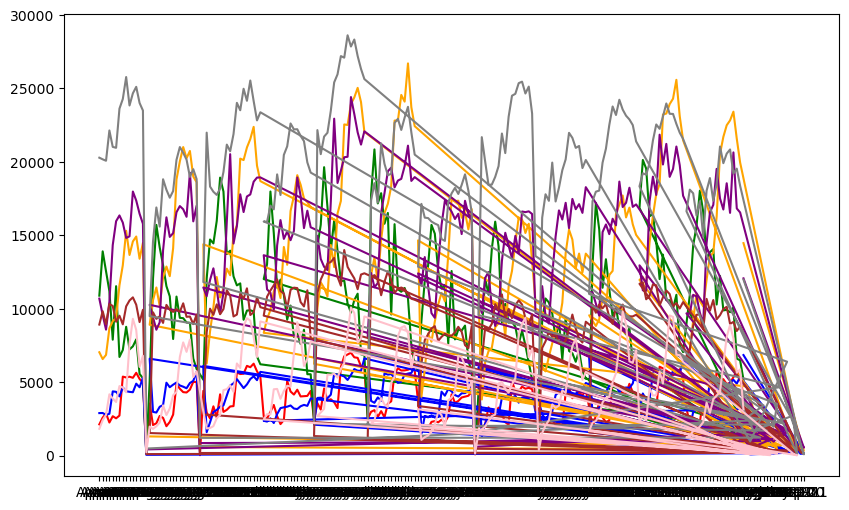

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataframes
seats_df = pd.read_csv("seats.csv")
city_pairs_df = pd.read_csv("city_pairs.csv")

# Merge dataframes on common columns
merged_df = pd.merge(seats_df, city_pairs_df, how="inner", left_on=["Australian_City", "International_City", "Month_num", "Year", "Month"], right_on=["AustralianPort", "ForeignPort", "Month_num", "Year", "Month"])
# merged_df.columns
# # Filter for desired metrics
filtered_df = merged_df[["Month", "Max_Seats", "Port_Region", "Passengers_In", "Passengers_Out"]]
filtered_df?
# Group data by month and region and get average values
grouped_df = filtered_df.groupby(["Month", "Port_Region"]).mean().reset_index()

# Create line chart
fig, ax = plt.subplots(figsize=(10,6))

colors = ["red", "green", "blue", "orange", "purple", "brown", "gray", "pink"]

for i, region in enumerate(grouped_df["Port_Region"].unique()):
    region_data = grouped_df[grouped_df["Port_Region"] == region]
    ax.plot(region_data["Month"], region_data["Passengers_In"], color=colors[i], label=region)

ax.legend(loc="upper left")
ax.set_xlabel("Month")
ax.set_ylabel("Average Passenger Numbers")
ax.set_title("Seat Utilization by Region")

plt.savefig("YOUR_ZID_q7.png")
plt.show()
# Merge dataframes on 'Australian_City' and 'International_City'
# merged_df = pd.merge(seats_df, city_pairs_df, left_on=['Australian_City', 'International_City'], right_on=['AustralianPort', 'ForeignPort'], how='inner')

# # Filter data to only include September 2003 to September 2022
# merged_df = merged_df[(merged_df['Year'] >= 2003) & (merged_df['Month'] >= '09')]

# # Group data by year, month, and port region and calculate seat utilization percentage
# grouped_df = merged_df.groupby(['Year', 'Month', 'Port_Region']).agg({'Passengers_In': 'sum', 'Passengers_Out': 'sum', 'Max_Seats': 'sum'})
# grouped_df['Seat_Utilization'] = (grouped_df['Passengers_In'] + grouped_df['Passengers_Out']) / grouped_df['Max_Seats'] * 100

# # Plot seat utilization trends over time for each region
# regions = grouped_df.index.get_level_values('Port_Region').unique()
# fig, axs = plt.subplots(len(regions), figsize=(12, 18), sharex=True)
# for i, region in enumerate(regions):
#     region_data = grouped_df.xs(region, level='Port_Region')
#     axs[i].plot(region_data.index.get_level_values('Year'), region_data['Seat_Utilization'])
#     axs[i].set_title(region)

# plt.suptitle('Seat Utilization Trends by Region', fontsize=20)
# plt.xlabel('Year')
# plt.ylabel('Seat Utilization Percentage')
# plt.savefig('YOUR_ZID_q7.png')
# plt.show()

# # Merge the data on "Australian_City" and "International_City"
# merged_df = pd.merge(seats_df, city_pairs_df, left_on=["Australian_City", "International_City"], right_on=["AustralianPort", "ForeignPort"], how="left")
# print(merged_df)
# # Filter the data for September 2003 to September 2022
# merged_df = merged_df[(merged_df["Year"] >= 2003) & (merged_df["Year"] <= 2022) & (merged_df["Month"] >= "09")]

# # Calculate the seat utilisation rate
# merged_df["Seat_Utilisation_Rate"] = (merged_df["Passengers_In"] + merged_df["Passengers_Out"]) / merged_df["Max_Seats"]

# # Group the data by "Port_Region" and "Year-Month" and calculate the average seat utilisation rate
# grouped_df = merged_df.groupby(["Port_Region", "Year-Month"], as_index=False)["Seat_Utilisation_Rate"].mean()

# # Create the plot
# plt.figure(figsize=(12, 8))
# colors = ["blue", "green", "red", "purple", "orange", "brown", "pink", "gray"]
# regions = grouped_df["Port_Region"].unique()
# for i in range(len(regions)):
#     region = regions[i]
#     color = colors[i % len(colors)]
#     data = grouped_df[grouped_df["Port_Region"] == region]
#     plt.plot(data["Year-Month"], data["Seat_Utilisation_Rate"], label=region, color=color)
# plt.legend()
# plt.xlabel("Year-Month")
# plt.ylabel("Seat Utilisation Rate")
# plt.title("Seat Utilisation Trends Across Different Regions")
# plt.show()

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
seats = pd.read_csv("seats.csv")
city_pairs = pd.read_csv("city_pairs.csv")

# join the data
data = pd.merge(seats, city_pairs, how="inner", left_on=["Australian_City", "International_City", "Month_num", "Year", "Month"], right_on=["AustralianPort", "ForeignPort", "Month_num", "Year", "Month"])
data = data.drop_duplicates()
# calculate seat utilisation
data["Passengers_In_Percent"] = data["Passengers_In"] / data["Max_Seats"] * 100
data["Passengers_Out_Percent"] = data["Passengers_Out"] / data["Max_Seats"] * 100

# group the data and calculate average seat utilisation by region and month
grouped_data = data.groupby(["Port_Region", "Year"]).agg({"Passengers_In_Percent": "mean", "Passengers_Out_Percent": "mean"})

# create the chart
plt.figure(figsize=(10, 6))
for region, region_data in grouped_data.groupby("Port_Region"):
    plt.plot(region_data.index.get_level_values("Year"), region_data["Passengers_In_Percent"], label=f"{region} In")
    plt.plot(region_data.index.get_level_values("Year"), region_data["Passengers_Out_Percent"], label=f"{region} Out")

plt.title("Seat Utilisation Trends by Region")
plt.xlabel("Year")
plt.ylabel("Seat Utilisation (%)")
plt.legend()
plt.savefig("YOUR_ZID_q7.png")
plt.show()


AttributeError: 'function' object has no attribute 'groupby'

<Figure size 1000x600 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\divij\AppData\Local\Temp\ipykernel_6624\1399457597.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


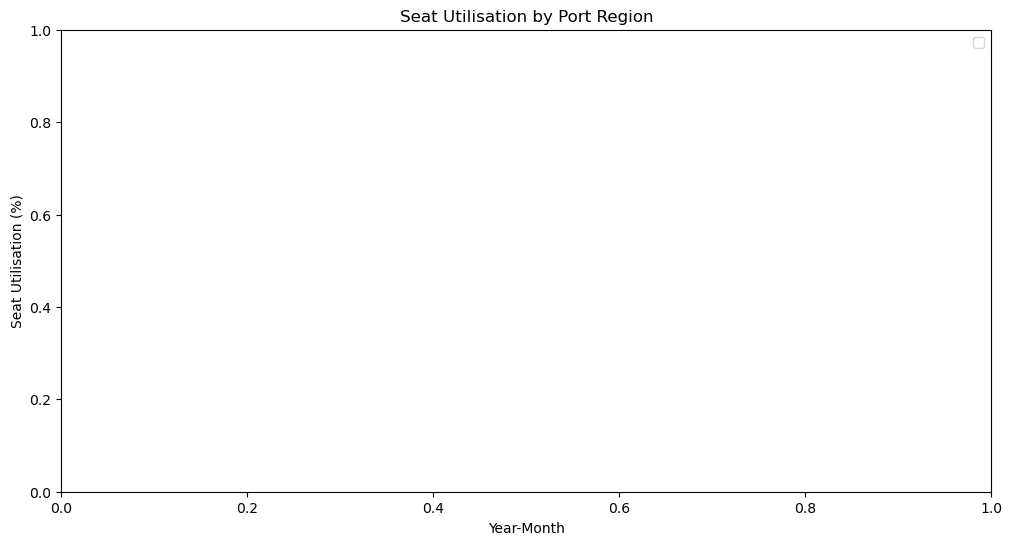

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
seats = pd.read_csv("seats.csv")
city_pairs = pd.read_csv("city_pairs.csv")

# join the data
merged_df = pd.merge(seats, city_pairs, how="inner", left_on=["Australian_City", "International_City", "Month_num", "Year", "Month"], right_on=["AustralianPort", "ForeignPort", "Month_num", "Year", "Month"])
# data = data.drop_duplicates()

# Filter data to include only September 2003 to September 2022
merged_df = merged_df[(merged_df['Year'] >= 2003) & (merged_df['Month'] >= '2003-09') & (merged_df['Month'] <= '2022-09')]

# Group data by port region and year/month to calculate average passenger numbers
grouped_df = merged_df.groupby(['Port_Region', 'Year', 'Month']).agg({'Passengers_In': 'mean', 'Passengers_Out': 'mean', 'Max_Seats': 'mean'})

# Calculate seat utilisation percentage
grouped_df['Seat_Utilisation'] = (grouped_df['Passengers_In'] + grouped_df['Passengers_Out']) / grouped_df['Max_Seats'] * 100

# Plot seat utilisation for each region over time
fig, ax = plt.subplots(figsize=(12,6))

regions = grouped_df.index.levels[0]
colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, region in enumerate(regions):
    region_data = grouped_df.loc[region]
    ax.plot(region_data.index, region_data['Seat_Utilisation'], color=colors[i], label=region)

ax.legend()
ax.set_xlabel('Year-Month')
ax.set_ylabel('Seat Utilisation (%)')
ax.set_title('Seat Utilisation by Port Region')

fig.show()



<function matplotlib.pyplot.show(close=None, block=None)>

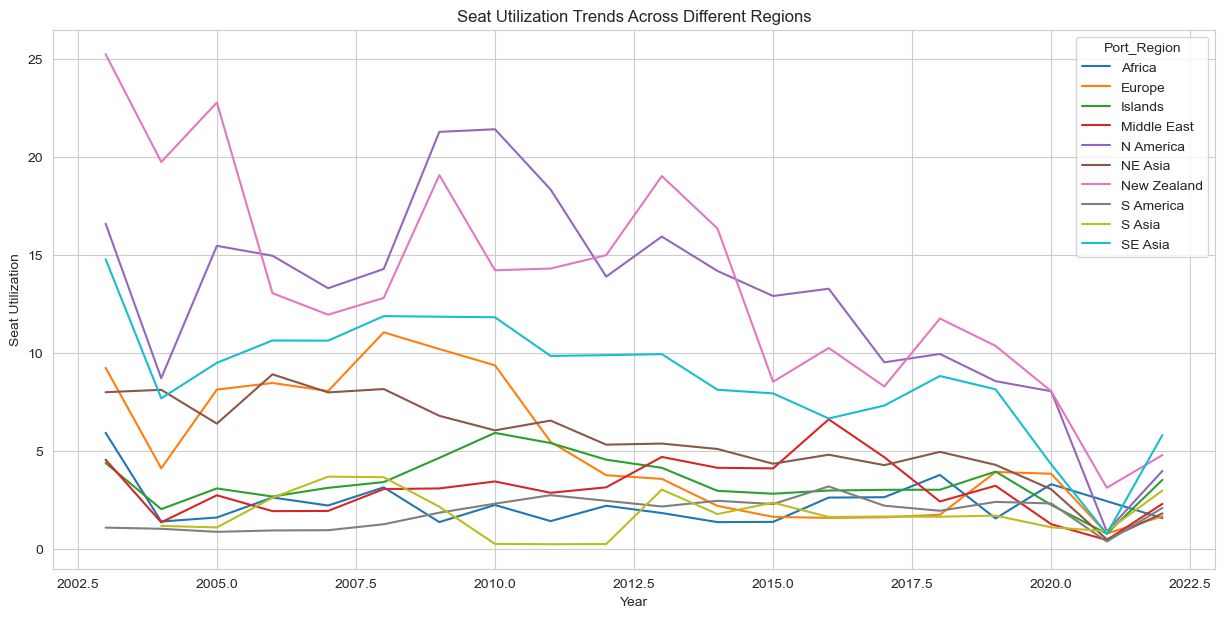

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the datasets
seats = pd.read_csv("seats.csv")
city_pairs = pd.read_csv("city_pairs.csv")

# merge the datasets on the common columns
# merged_df = pd.merge(seats, city_pairs, on=["Month", "Port_Region"])
merged_df = pd.merge(seats, city_pairs, how="inner", left_on=["Australian_City", "International_City", "Month_num", "Year", "Month"], right_on=["AustralianPort", "ForeignPort", "Month_num", "Year", "Month"])

# create a new column for seat utilization
merged_df["Seat_Utilization"] = (merged_df["Passengers_In"] + merged_df["Passengers_Out"]) / merged_df["Max_Seats"]

# group the data by region and month
grouped_df = merged_df.groupby(["Port_Region", "Year"]).mean().reset_index()

# create a line plot to visualize trends over time for seat utilization across different regions of the world
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(data=grouped_df, x="Year", y="Seat_Utilization", hue="Port_Region", ax=ax)
plt.title("Seat Utilization Trends Across Different Regions")
plt.xlabel("Year")
plt.ylabel("Seat Utilization")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

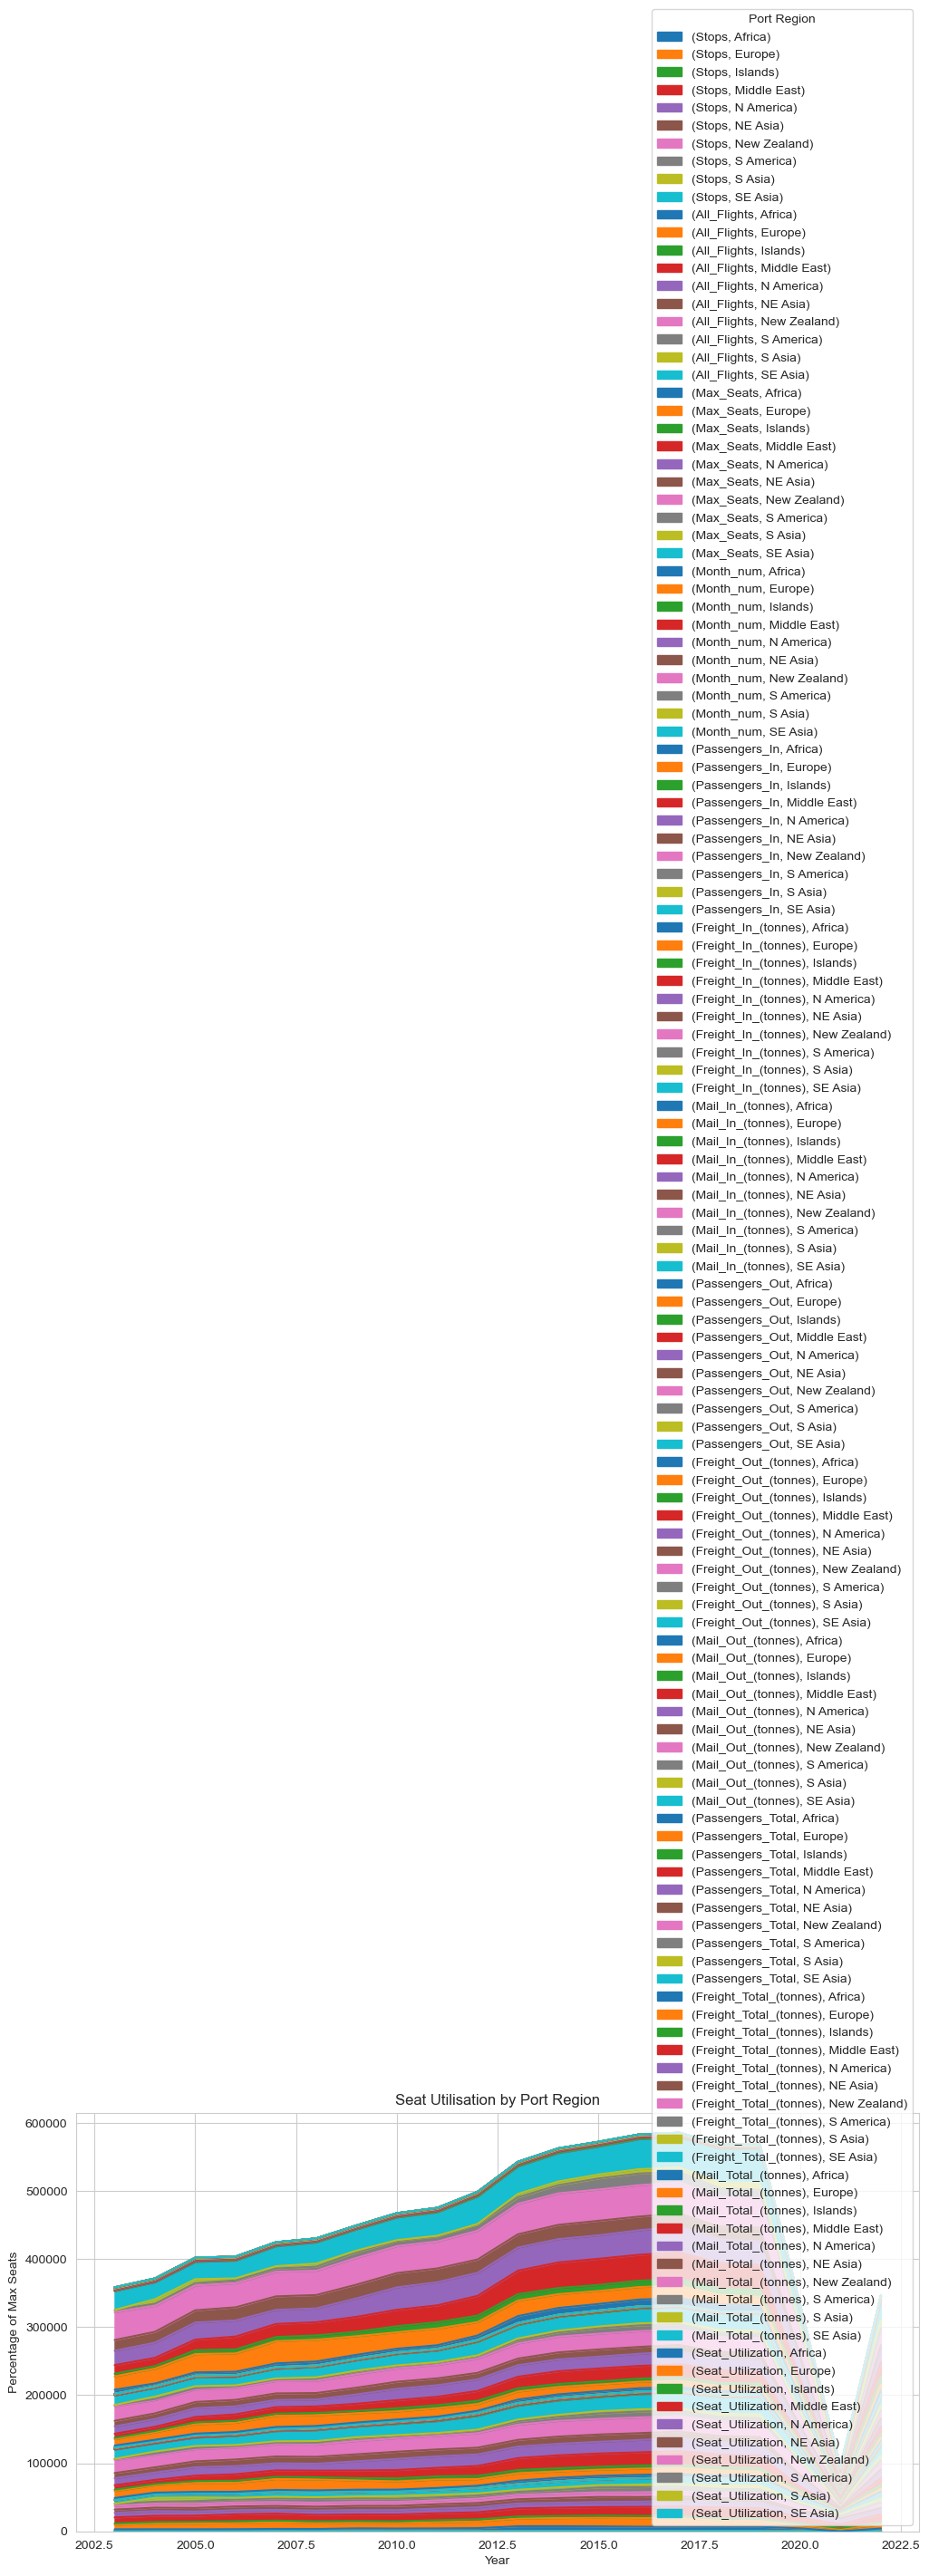

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the datasets
seats = pd.read_csv("seats.csv")
city_pairs = pd.read_csv("city_pairs.csv")

# merge the datasets on the common columns
# merged_df = pd.merge(seats, city_pairs, on=["Month", "Port_Region"])
merged_df = pd.merge(seats, city_pairs, how="inner", left_on=["Australian_City", "International_City", "Month_num", "Year", "Month"], right_on=["AustralianPort", "ForeignPort", "Month_num", "Year", "Month"])

# create a new column for seat utilization
merged_df["Seat_Utilization"] = (merged_df["Passengers_In"] + merged_df["Passengers_Out"]) / merged_df["Max_Seats"]

# group the data by region and month
grouped_df = merged_df.groupby(["Port_Region", "Year"]).mean().reset_index()
pivoted_df = grouped_df.pivot(index='Year', columns='Port_Region')
# create a line plot to visualize trends over time for seat utilization across different regions of the world
fig, ax = plt.subplots(figsize=(12,6))
pivoted_df.plot(kind='area', stacked=True, ax=ax)
ax.set_title('Seat Utilisation by Port Region')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Max Seats')
ax.legend(title='Port Region')
plt.show


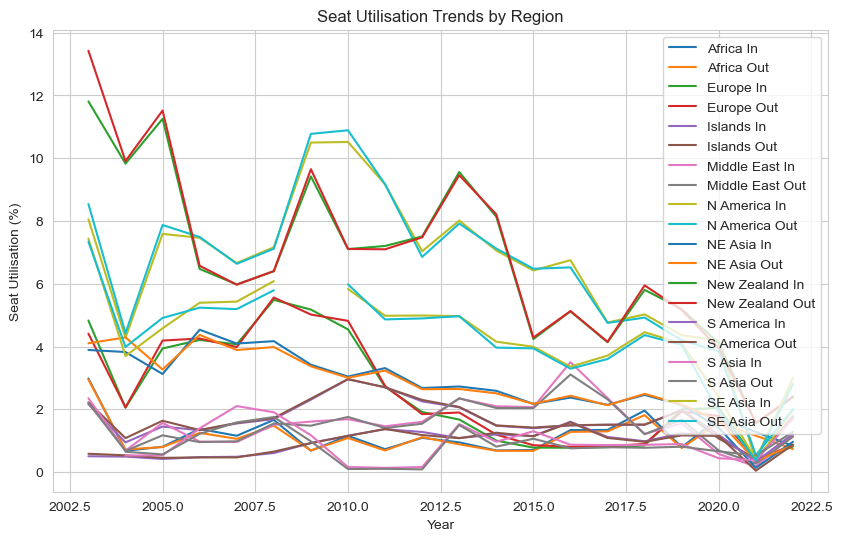

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the datasets
seats = pd.read_csv("seats.csv")
city_pairs = pd.read_csv("city_pairs.csv")

# merge the datasets on the common columns
# merged_df = pd.merge(seats, city_pairs, on=["Month", "Port_Region"])
merged_df = pd.merge(seats, city_pairs, how="inner", left_on=["Australian_City", "International_City", "Month_num", "Year", "Month"], right_on=["AustralianPort", "ForeignPort", "Month_num", "Year", "Month"])

# create a new column for seat utilization
merged_df["Passengers_In_Percent"] = ((merged_df["Passengers_In"]) / merged_df["Max_Seats"])
merged_df["Passengers_Out_Percent"] = ((merged_df["Passengers_Out"]) / merged_df["Max_Seats"])
# group the data by region and month
grouped_df = merged_df.groupby(["Port_Region", "Year"]).mean()

# create a line plot to visualize trends over time for seat utilization across different regions of the world
plt.figure(figsize=(10, 6))
for region, region_data in grouped_df.groupby("Port_Region"):
    plt.plot(region_data.index.get_level_values('Year'), region_data["Passengers_In_Percent"], label=f"{region} In")
    plt.plot(region_data.index.get_level_values('Year'), region_data["Passengers_Out_Percent"], label=f"{region} Out")

plt.title("Seat Utilisation Trends by Region")
plt.xlabel("Year")
plt.ylabel("Seat Utilisation (%)")
plt.legend()
plt.savefig("YOUR_ZID_q7.png")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

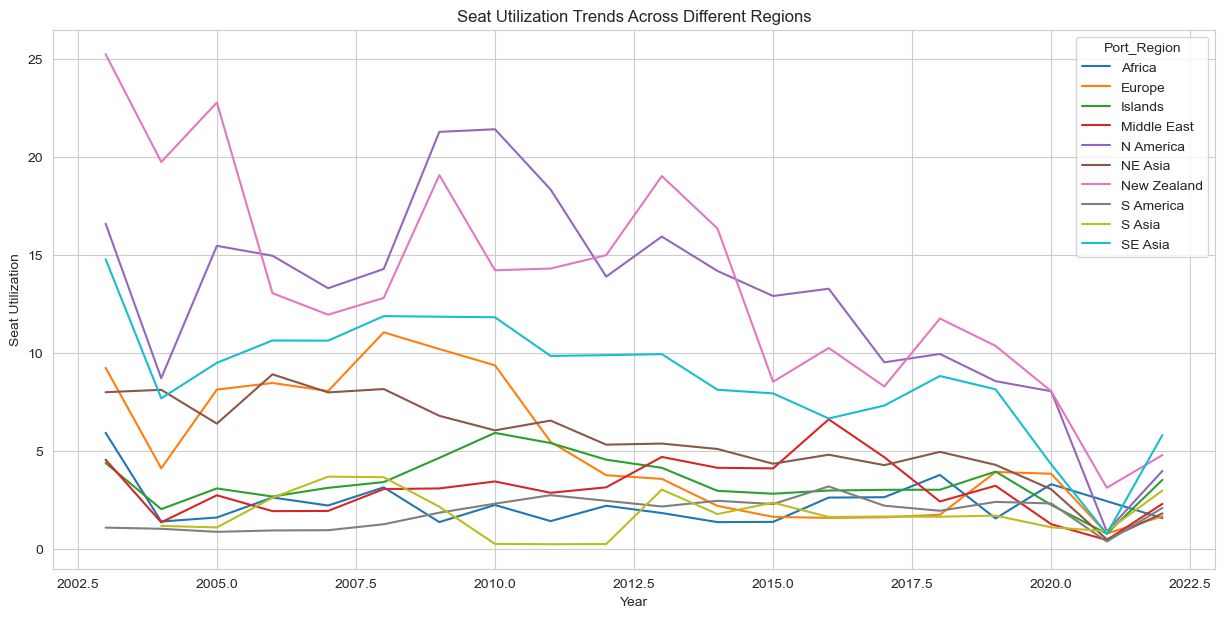

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the datasets
seats = pd.read_csv("seats.csv")
city_pairs = pd.read_csv("city_pairs.csv")

# merge the datasets on the common columns
# merged_df = pd.merge(seats, city_pairs, on=["Month", "Port_Region"])
merged_df = pd.merge(seats, city_pairs, how="inner", left_on=["Australian_City", "International_City", "Month_num", "Year", "Month"], right_on=["AustralianPort", "ForeignPort", "Month_num", "Year", "Month"])

# create a new column for seat utilization
merged_df["Seat_Utilization"] = (merged_df["Passengers_In"] + merged_df["Passengers_Out"]) / merged_df["Max_Seats"]

# group the data by region and month
grouped_df = merged_df.groupby(["Port_Region", "Year"]).mean().reset_index()

# create a line plot to visualize trends over time for seat utilization across different regions of the world
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(data=grouped_df, x="Year", y="Seat_Utilization", hue="Port_Region", ax=ax)
plt.title("Seat Utilization Trends Across Different Regions")
plt.xlabel("Year")
plt.ylabel("Seat Utilization")
plt.show


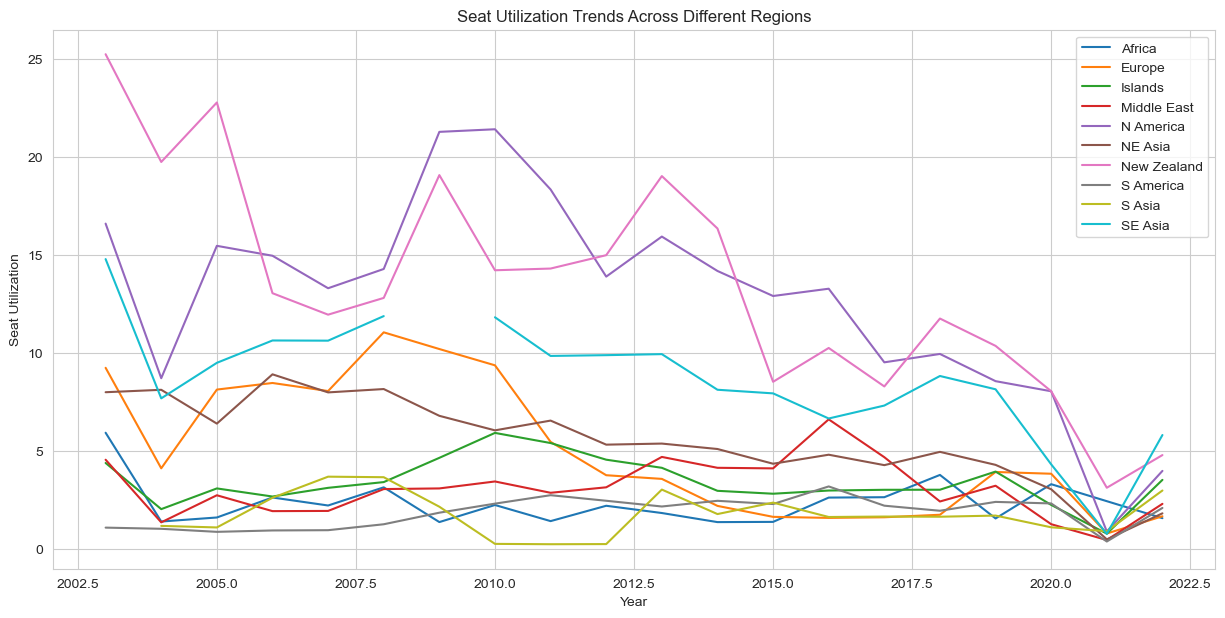

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# load the datasets
seats = pd.read_csv("seats.csv")
city_pairs = pd.read_csv("city_pairs.csv")

# merge the datasets on the common columns
# merged_df = pd.merge(seats, city_pairs, on=["Month", "Port_Region"])
merged_df = pd.merge(seats, city_pairs, how="inner", left_on=["Australian_City", "International_City", "Month_num", "Year", "Month"], right_on=["AustralianPort", "ForeignPort", "Month_num", "Year", "Month"])

# create a new column for seat utilization
merged_df["Seat_Utilization"] = (merged_df["Passengers_In"] + merged_df["Passengers_Out"]) / merged_df["Max_Seats"]

# group the data by region and month
grouped_df = merged_df.groupby(["Port_Region", "Year"]).mean().reset_index()

# create a line plot to visualize trends over time for seat utilization across different regions of the world
fig, ax = plt.subplots(figsize=(15,7))
for region, data in grouped_df.groupby("Port_Region"):
    ax.plot(data["Year"], data["Seat_Utilization"], label=region)
ax.set(title="Seat Utilization Trends Across Different Regions",
       xlabel="Year", ylabel="Seat Utilization")
ax.legend()
plt.show()


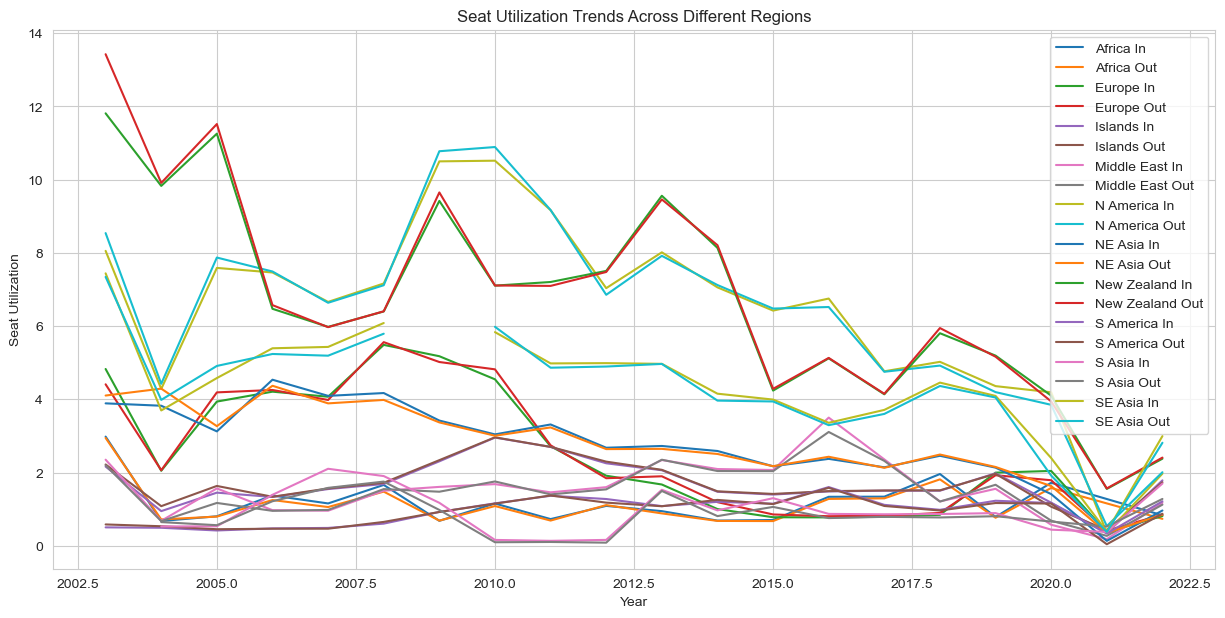

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# load the datasets
seats = pd.read_csv("seats.csv")
city_pairs = pd.read_csv("city_pairs.csv")

# merge the datasets on the common columns
# merged_df = pd.merge(seats, city_pairs, on=["Month", "Port_Region"])
merged_df = pd.merge(seats, city_pairs, how="inner", left_on=["Australian_City", "International_City", "Month_num", "Year", "Month"], right_on=["AustralianPort", "ForeignPort", "Month_num", "Year", "Month"])

# create a new column for seat utilization
merged_df["In_Utilization"] = merged_df["Passengers_In"] / merged_df["Max_Seats"]
merged_df["Out_Utilization"] = merged_df["Passengers_Out"] / merged_df["Max_Seats"]


# group the data by region and month
grouped_df = merged_df.groupby(["Port_Region", "Year"]).mean().reset_index()

# create a line plot to visualize trends over time for seat utilization across different regions of the world
fig, ax = plt.subplots(figsize=(15,7))
for region in grouped_df["Port_Region"].unique():
    region_df = grouped_df[grouped_df["Port_Region"] == region]
    ax.plot(region_df["Year"], region_df["In_Utilization"], label=f"{region} In")
    ax.plot(region_df["Year"], region_df["Out_Utilization"], label=f"{region} Out")
ax.legend()
ax.set_title("Seat Utilization Trends Across Different Regions")
ax.set_xlabel("Year")
ax.set_ylabel("Seat Utilization")
ax.legend()
plt.show()
